In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import itertools
%matplotlib inline

mpl.rc('font', family='AppleGothic')  # macOS Í∏∞Î≥∏ ÌïúÍ∏Ä ÏßÄÏõê Ìè∞Ìä∏
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('nightlife_crime.csv')

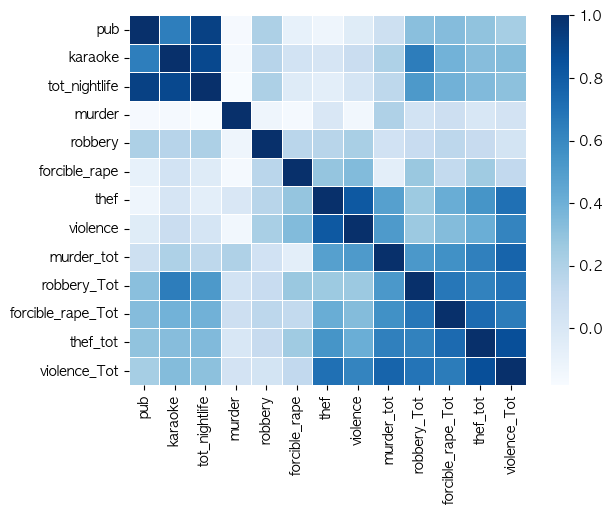

In [24]:
# Î¨∏ÏûêÏó¥ Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Ïà´ÏûêÌòïÎßå ÏÑ†ÌÉùÌï¥ÏÑú ÏÉÅÍ¥ÄÌñâÎ†¨ Í≥ÑÏÇ∞
numeric_data = data.select_dtypes(include=['number'])  # Ïà´ÏûêÌòï Ïª¨ÎüºÎßå Ï∂îÏ∂ú
corr_matrix = numeric_data.corr(method='pearson')
corr_matrix

#heatmap
plt.figure()
sns.heatmap(data = numeric_data.corr(), annot=False,
            fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [20]:
# ÌååÏÉùÎ≥ÄÏàò Í≥ÑÏÇ∞

data['crime_tot'] = data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot']
data['murder_ratio'] = data['murder'] / data['murder_tot']
data['robbery_ratio'] = data['robbery'] / data['robbery_Tot']
data['rape_ratio'] = data['forcible_rape'] / data['forcible_rape_Tot']
data['thef_ratio'] = data['thef'] / data['thef_tot']
data['violence_ratio'] = data['violence'] / data['violence_Tot']
data['total_youth_ratio'] = (data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']) / \
                          (data['murder_tot'] + data['robbery_Tot'] + data['forcible_rape_Tot'] + data['thef_tot'] + data['violence_Tot'])
data['total_youth'] = data['murder'] + data['robbery'] + data['forcible_rape'] + data['thef'] + data['violence']

data

region  pub  karaoke  tot_nightlife  murder  robbery  forcible_rape  thef  \
0      Í∞ïÎÇ®  283      354            637       0        6             19   140   
1      Í∞ïÎèô  146      106            252       0        3              6   193   
2      Í∞ïÎ∂Å   79      128            207       0        0              9   166   
3      Í∞ïÏÑú  113      167            280       0        3              9   273   
4      Í¥ÄÏïÖ  223       99            322       0        2             14   170   
5      Í¥ëÏßÑ   19       91            110       0        0             29   155   
6      Íµ¨Î°ú   38      110            148       0        1              3   157   
7      Í∏àÏ≤ú   60       82            142       0        0              7   146   
8      ÎÖ∏Ïõê   30       57             87       0        6             14   227   
9      ÎèÑÎ¥â   21       55             76       0        6             21   126   
10    ÎèôÎåÄÎ¨∏   88      115            203       1        1              5   126   
11     ÎèôÏûë   55       55            110       1        3              6   107   
12     ÎßàÌè¨   71      104            175       0        0             13   156   
13    ÏÑúÎåÄÎ¨∏   48       81            129       0        4              5   142   
14     ÏÑúÏ¥à   88      120            208       0        1              7    39   
15     ÏÑ±Îèô   22       52             74       0        0             11   105   
16     ÏÑ±Î∂Å    8       79             87       0        1              5    69   
17     ÏÜ°Ìåå   97      181            278       0        6              8   196   
18     ÏñëÏ≤ú    7       81             88       0        0              8   169   
19    ÏòÅÎì±Ìè¨  200      293            493       0        0              6   119   
20     Ïö©ÏÇ∞   38      129            167       0        4              4    56   
21     ÏùÄÌèâ   79      153            232       0        0              8    99   
22     Ï¢ÖÎ°ú  229      140            369       0        3              4    34   
23     Ï§ëÍµ¨  260      105            365       0        2              3    82   
24     Ï§ëÎûë   27      105            132       1        0              9   179   

    violence  murder_tot  ...  thef_tot  violence_Tot  crime_tot  \
0        176           3  ...      2484          2604       5422   
1        158           4  ...      2366          2712       5244   
2        210           7  ...      1434          2649       4257   
3        240           7  ...      2096          3207       5585   
4        209           9  ...      2706          3298       6345   
5        153           4  ...      3026          2625       5909   
6        194           8  ...      2335          3007       5646   
7         66           3  ...      1567          2054       3781   
8        337          10  ...      2193          2723       5130   
9        107           3  ...      1063          1487       2664   
10        76           5  ...      1865          1910       4074   
11        65           5  ...      1981          2548       4720   
12       164           8  ...      2555          2983       5854   
13       103           7  ...      1982          1852       4183   
14        66           2  ...       819          1192       2085   
15        73           4  ...      1607          1612       3358   
16        99           2  ...       953          1194       2237   
17       165          11  ...      3239          3295       6778   
18       144           3  ...      1890          2509       4528   
19       118          14  ...      2964          3572       6867   
20        70           5  ...      1557          2050       3820   
21       121           1  ...      1095          1461       2660   
22        57           3  ...      1070          1278       2472   
23        71           5  ...      2509          2370       5093   
24       193          13  ...      2135          2847       5193   

    murder_ratio  robbery_ratio  rape_ratio  th

## ÏÇ∞Ï†êÎèÑ

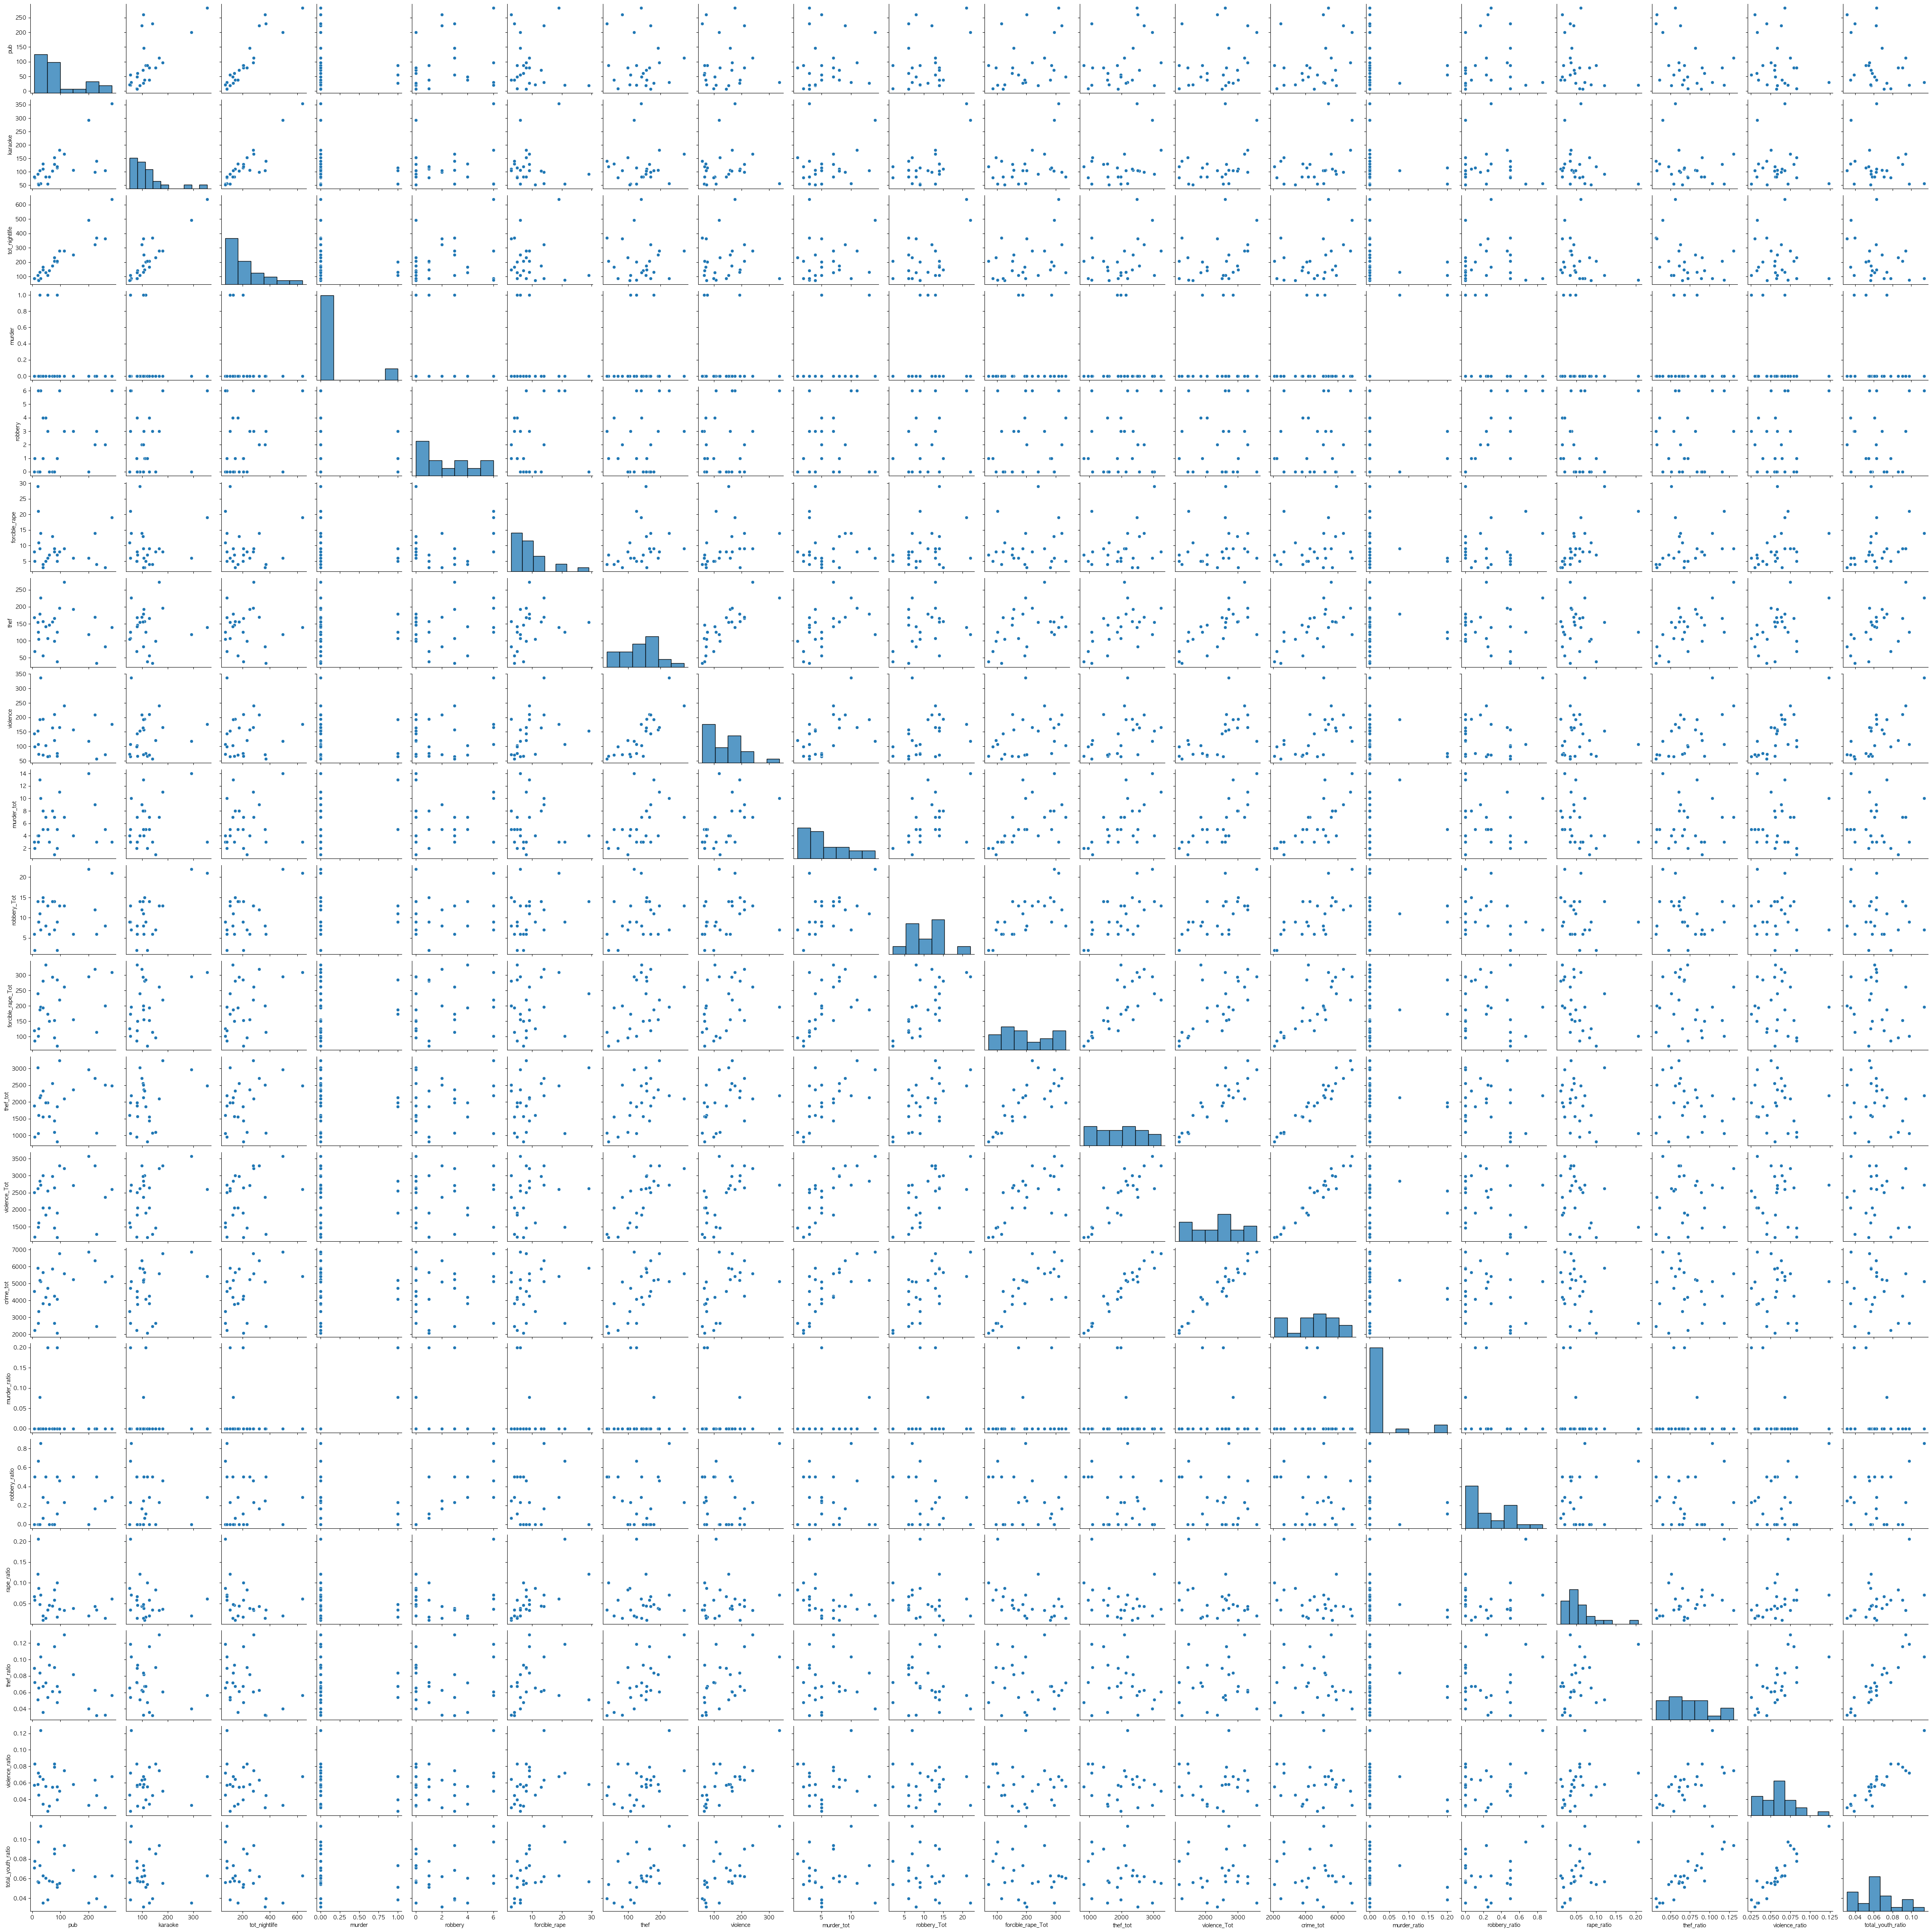

In [10]:
sns.pairplot(data)
plt.savefig('image/figure05.png')
plt.show()

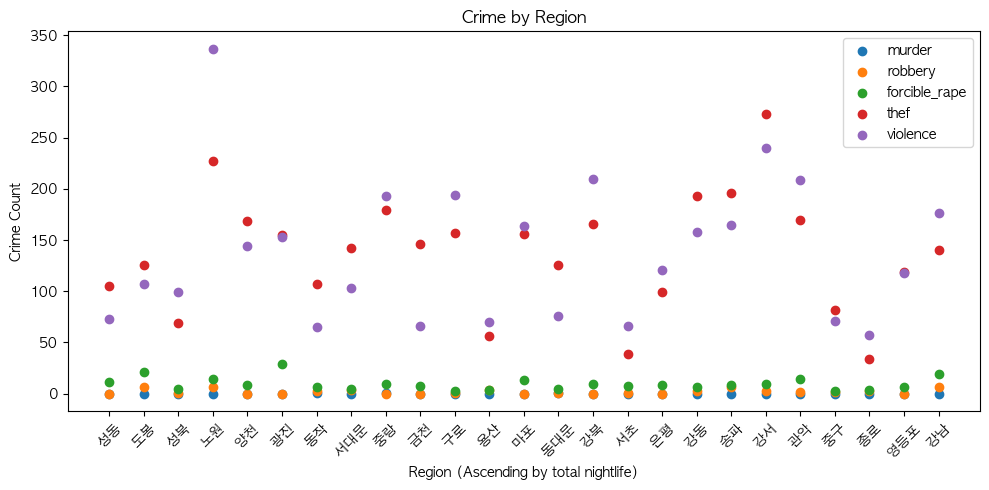

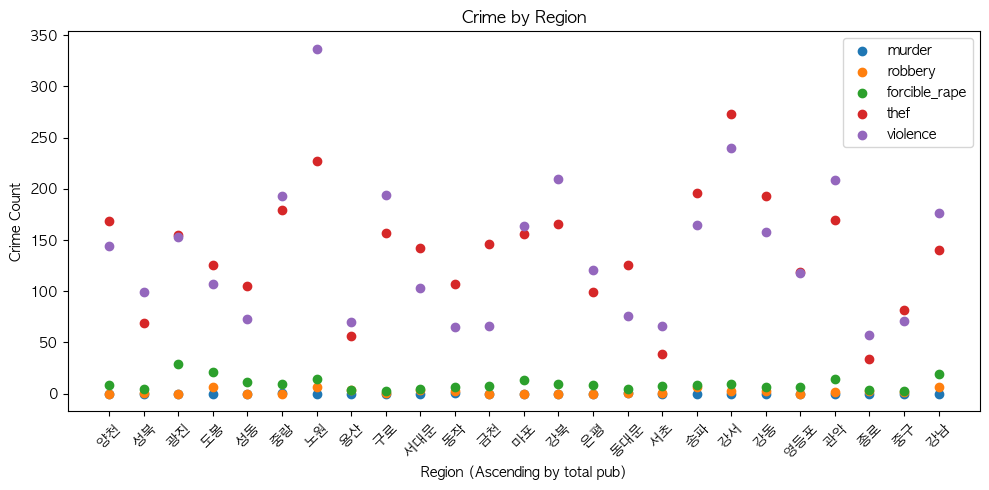

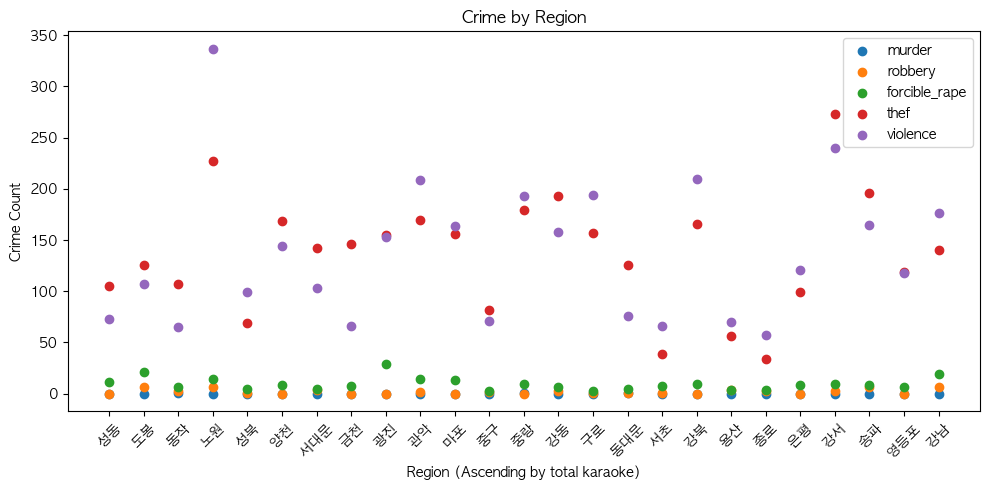

In [58]:
# ÏÇ∞Ï†êÎèÑ

# Ïú†Ìù•ÏóÖÏÜå Ï†êÌè¨Ïàò Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú ÏßÄÏó≠ Ï†ïÎ†¨, ÏÇ∞Ï†êÎèÑ
sort = data.sort_values(by='tot_nightlife',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total nightlife)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure01.png')
plt.show()

# pub Ï†êÌè¨Ïàò Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú ÏßÄÏó≠ Ï†ïÎ†¨, ÏÇ∞Ï†êÎèÑ
sort = data.sort_values(by='pub',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total pub)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure02.png')
plt.show()

# karaoke Ï†êÌè¨Ïàò Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú ÏßÄÏó≠ Ï†ïÎ†¨, ÏÇ∞Ï†êÎèÑ

sort = data.sort_values(by='karaoke',ascending=True)

plt.figure(figsize=(10, 5))
plt.scatter(sort['region'], sort['murder'], label='murder')
plt.scatter(sort['region'], sort['robbery'], label='robbery')
plt.scatter(sort['region'], sort['forcible_rape'], label='forcible_rape')
plt.scatter(sort['region'], sort['thef'], label='thef')
plt.scatter(sort['region'], sort['violence'], label='violence')
plt.scatter
plt.xticks(rotation=45)
plt.xlabel('Region (Ascending by total karaoke)')
plt.ylabel('Crime Count')
plt.title('Crime by Region')
plt.tight_layout()
plt.legend()
plt.savefig('image/figure03.png')
plt.show()


> Ï†êÌè¨Ïàò Î≥ÑÎ°ú Î≤îÏ£ÑÏú® Ï¶ùÍ∞Ä ÏïàÌïòÎäî Í≤É Í∞ôÏùÄÎç∞...?

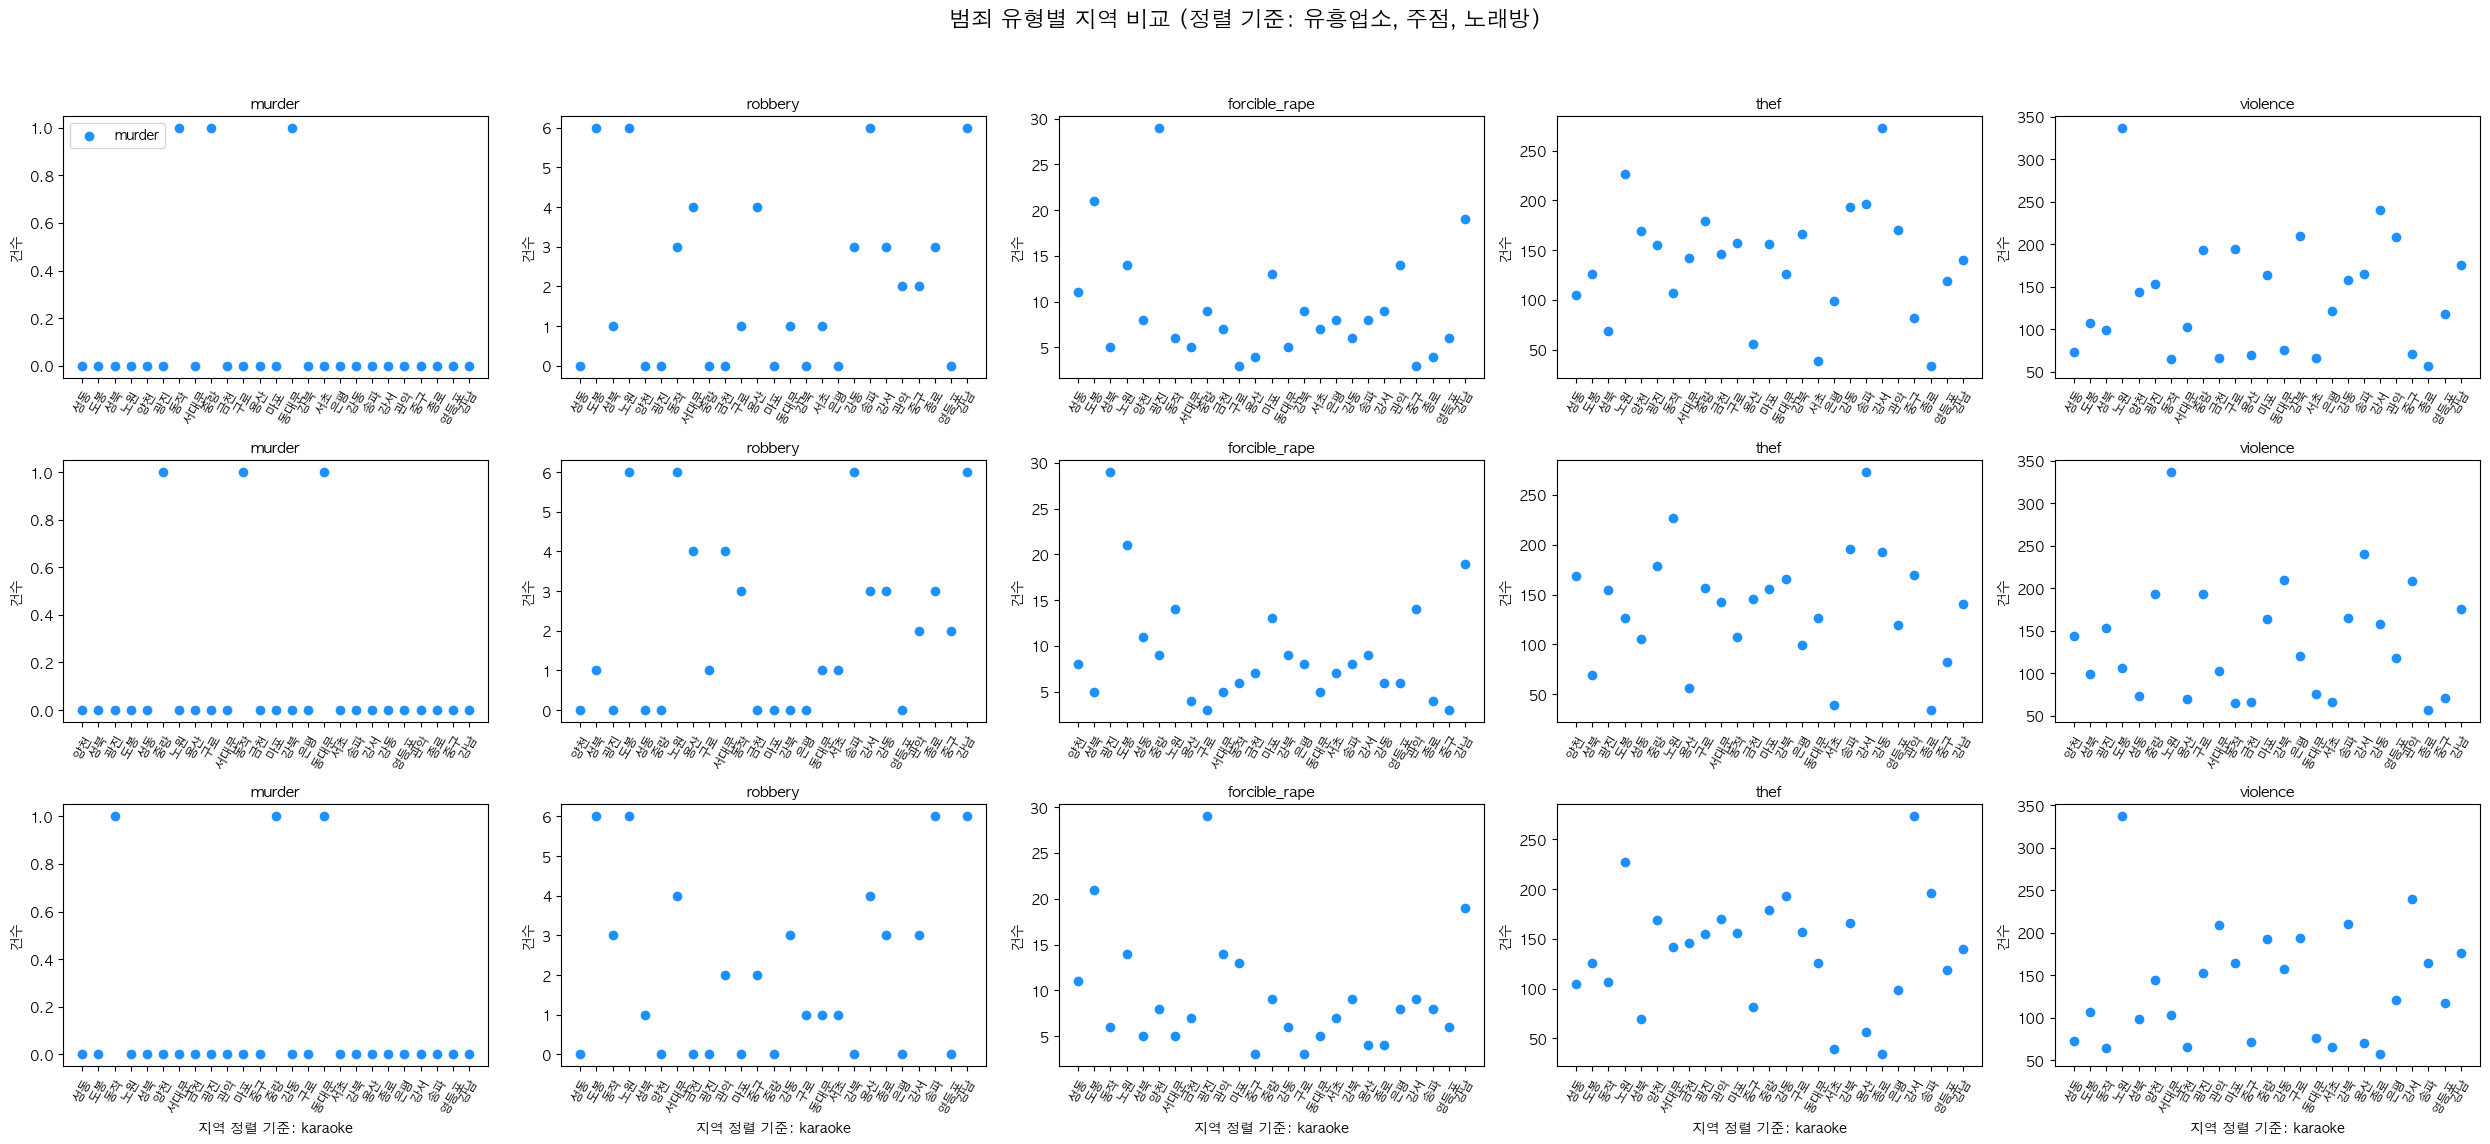

In [18]:
# Ï†ïÎ†¨ Í∏∞Ï§ÄÍ≥º Ïª¨Îüº Ïù¥Î¶Ñ
sort_keys = ['tot_nightlife', 'pub', 'karaoke']
crime_cols = ['murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ± (3Ìñâ x 5Ïó¥)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 12))
fig.suptitle('Î≤îÏ£Ñ Ïú†ÌòïÎ≥Ñ ÏßÄÏó≠ ÎπÑÍµê (Ï†ïÎ†¨ Í∏∞Ï§Ä: Ïú†Ìù•ÏóÖÏÜå, Ï£ºÏ†ê, ÎÖ∏ÎûòÎ∞©)', fontsize=16)
plt.subplots_adjust(hspace=0.4)

# Î∞òÎ≥µÌï¥ÏÑú Í∞Å Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
for i, sort_key in enumerate(sort_keys):
    sorted_data = data.sort_values(by=sort_key, ascending=True)
    for j, crime in enumerate(crime_cols):
        ax = axes[i, j]
        ax.scatter(sorted_data['region'], sorted_data[crime], color='dodgerblue', label=crime)
        ax.set_title(f"{crime}", fontsize=11)
        ax.set_xticks(range(len(sorted_data['region'])))
        ax.set_xticklabels(sorted_data['region'], rotation=60, fontsize=9)
        ax.set_ylabel('Í±¥Ïàò')
        if i == 2:  # ÎßàÏßÄÎßâ ÌñâÎßå xÏ∂ï ÎùºÎ≤®
            ax.set_xlabel(f"ÏßÄÏó≠ Ï†ïÎ†¨ Í∏∞Ï§Ä: {sort_key}")

# Î≤îÎ°ÄÎäî ÌïòÎÇòÎßå Îî∞Î°ú
axes[0, 0].legend(loc='upper left')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ï†úÎ™© ÏòÅÏó≠ ÌôïÎ≥¥
plt.savefig('image/figure04.png')
plt.show()


# ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò

Î∂ÑÏÑù Í∏∞Ï§Ä
- 0.7 Ïù¥ÏÉÅ: Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥Ä
- 0.3 ~ 0.7: Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÏÉÅÍ¥Ä
- 0 ~ 0.3: ÏïΩÌïú ÏÉÅÍ¥Ä
- ÏùåÏàò: Î∞òÎπÑÎ°Ä Í¥ÄÍ≥Ñ


In [15]:
# Î¨∏ÏûêÏó¥ Ïª¨Îüº Ï†úÏô∏ÌïòÍ≥† Ïà´ÏûêÌòïÎßå ÏÑ†ÌÉùÌï¥ÏÑú ÏÉÅÍ¥ÄÌñâÎ†¨ Í≥ÑÏÇ∞
numeric_data = data.select_dtypes(include=['number'])  # Ïà´ÏûêÌòï Ïª¨ÎüºÎßå Ï∂îÏ∂ú
corr_matrix = numeric_data.corr(method='pearson')
corr_matrix

pub   karaoke  tot_nightlife    murder   robbery  \
pub                1.000000  0.645022       0.922502 -0.166262  0.206950   
karaoke            0.645022  1.000000       0.889996 -0.161529  0.170792   
tot_nightlife      0.922502  0.889996       1.000000 -0.180798  0.209755   
murder            -0.166262 -0.161529      -0.180798  1.000000 -0.128090   
robbery            0.206950  0.170792       0.209755 -0.128090  1.000000   
forcible_rape     -0.087177  0.041389      -0.031111 -0.161566  0.160439   
thef              -0.122257  0.017581      -0.064069  0.000619  0.168731   
violence          -0.040994  0.095926       0.023993 -0.142715  0.223769   
murder_tot         0.072228  0.205042       0.146668  0.197589  0.045288   
robbery_Tot        0.318181  0.652071       0.519228  0.042136  0.102684   
forcible_rape_Tot  0.334303  0.387320       0.395118  0.075428  0.147945   
thef_tot           0.300736  0.327938       0.345094  0.007788  0.112583   
violence_Tot       0.233037  0.337151       0.309352  0.038845  0.035530   
crime_tot          0.283625  0.354027       0.348061  0.028417  0.081306   
murder_ratio      -0.122442 -0.167796      -0.157817  0.931955 -0.064363   
robbery_ratio      0.038932 -0.140817      -0.047899 -0.195233  0.786430   
rape_ratio        -0.331106 -0.235801      -0.316674 -0.192183  0.118641   
thef_ratio        -0.410418 -0.240293      -0.366268 -0.041048  0.063735   
violence_ratio    -0.247990 -0.083646      -0.190224 -0.240056  0.224117   
total_youth_ratio -0.380246 -0.199648      -0.327734 -0.163895  0.189447   

                   forcible_rape      thef  violence  murder_tot  robbery_Tot  \
pub                    -0.087177 -0.122257 -0.040994    0.072228     0.318181   
karaoke                 0.041389  0.017581  0.095926    0.205042     0.652071   
tot_nightlife          -0.031111 -0.064069  0.023993    0.146668     0.519228   
murder                 -0.161566  0.000619 -0.142715    0.197589     0.042136   
robbery                 0.160439  0.168731  0.223769    0.045288     0.102684   
forcible_rape           1.000000  0.285533  0.340591   -0.065149     0.274810   
thef                    0.285533  1.000000  0.811187    0.486157     0.264591   
violence                0.340591  0.811187  1.000000    0.512233     0.268458   
murder_tot             -0.065149  0.486157  0.512233    1.000000     0.524660   
robbery_Tot             0.274810  0.264591  0.268458    0.524660     1.000000   
forcible_rape_Tot       0.127463  0.417398  0.337486    0.560966     0.675633   
thef_tot                0.256641  0.538971  0.411275    0.638719     0.630395   
violence_Tot            0.130125  0.707235  0.620140    0.763267     0.689725   
crime_tot               0.197819  0.644191  0.533981    0.731152     0.697052   
murder_ratio           -0.184743 -0.065892 -0.240540    0.045397     0.039269   
robbery_ratio           0.002491 -0.041870  0.126289   -0.102319    -0.390045   
rape_ratio              0.708211 -0.059256  0.006467   -0.380394    -0.206632   
thef_ratio              0.203778  0.652045  0.526944   -0.005993    -0.165370   
violence_ratio          0.341547  0.446321  0.767925    0.063223    -0.172480   
total_youth_ratio       0.350607  0.575112  0.691487   -0.004214    -0.214502   

                   forcible_rape_Tot  thef_tot  violence_Tot  crime_tot  \
pub                         0.334303  0.300736      0.233037   0.283625   
karaoke                     0.387320  0.327938      0.337151   0.354027   
tot_nightlife               0.395118  0.345094      0.309352   0.348061   
murder                      0.075428  0.007788      0.038845   0.028417   
robbery                     0.147945  0.112583      0.035530   0.081306   
forcible_rape               0.127463  0.256641      0.130125   0.197819   
thef                        0.417398  0.538971      0.707235   0.644191   
violence                    0.337486  0.411275      0.620140   0.533981   
murder_tot                  0.560966  0.638719    

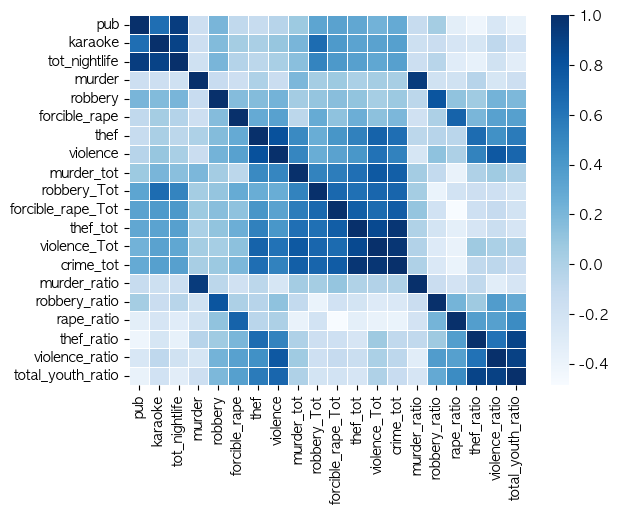

In [18]:
plt.figure()
sns.heatmap(data = numeric_data.corr(), annot=False,
            fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

## ÎπÑÍµêÏãúÍ∞ÅÌôî 1

Ïú†Ìù•ÏóÖÏÜå Ïàò vs Ï≤≠ÏÜåÎÖÑ Î≤îÏ£ÑÏú® ÎπÑÍµêÎ°ú ÏßÄÏó≠ Í∞Ñ Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ ÏàòÏ§ÄÏùò ÏÉÅÎåÄÏ†Å Ï∞®Ïù¥ ÌååÏïÖ

**ÏãúÍ∞ÅÌôî Î∞©Ïãù: ÏÇ∞Ï†êÎèÑ(Scatter Plot)**
xÏ∂ï: 'tot_nightlife', 'pub', 'karaoke'
yÏ∂ï: 'total_youth', 'murder', 'robbery', 'forcible_rape', 'thef', 'violence'

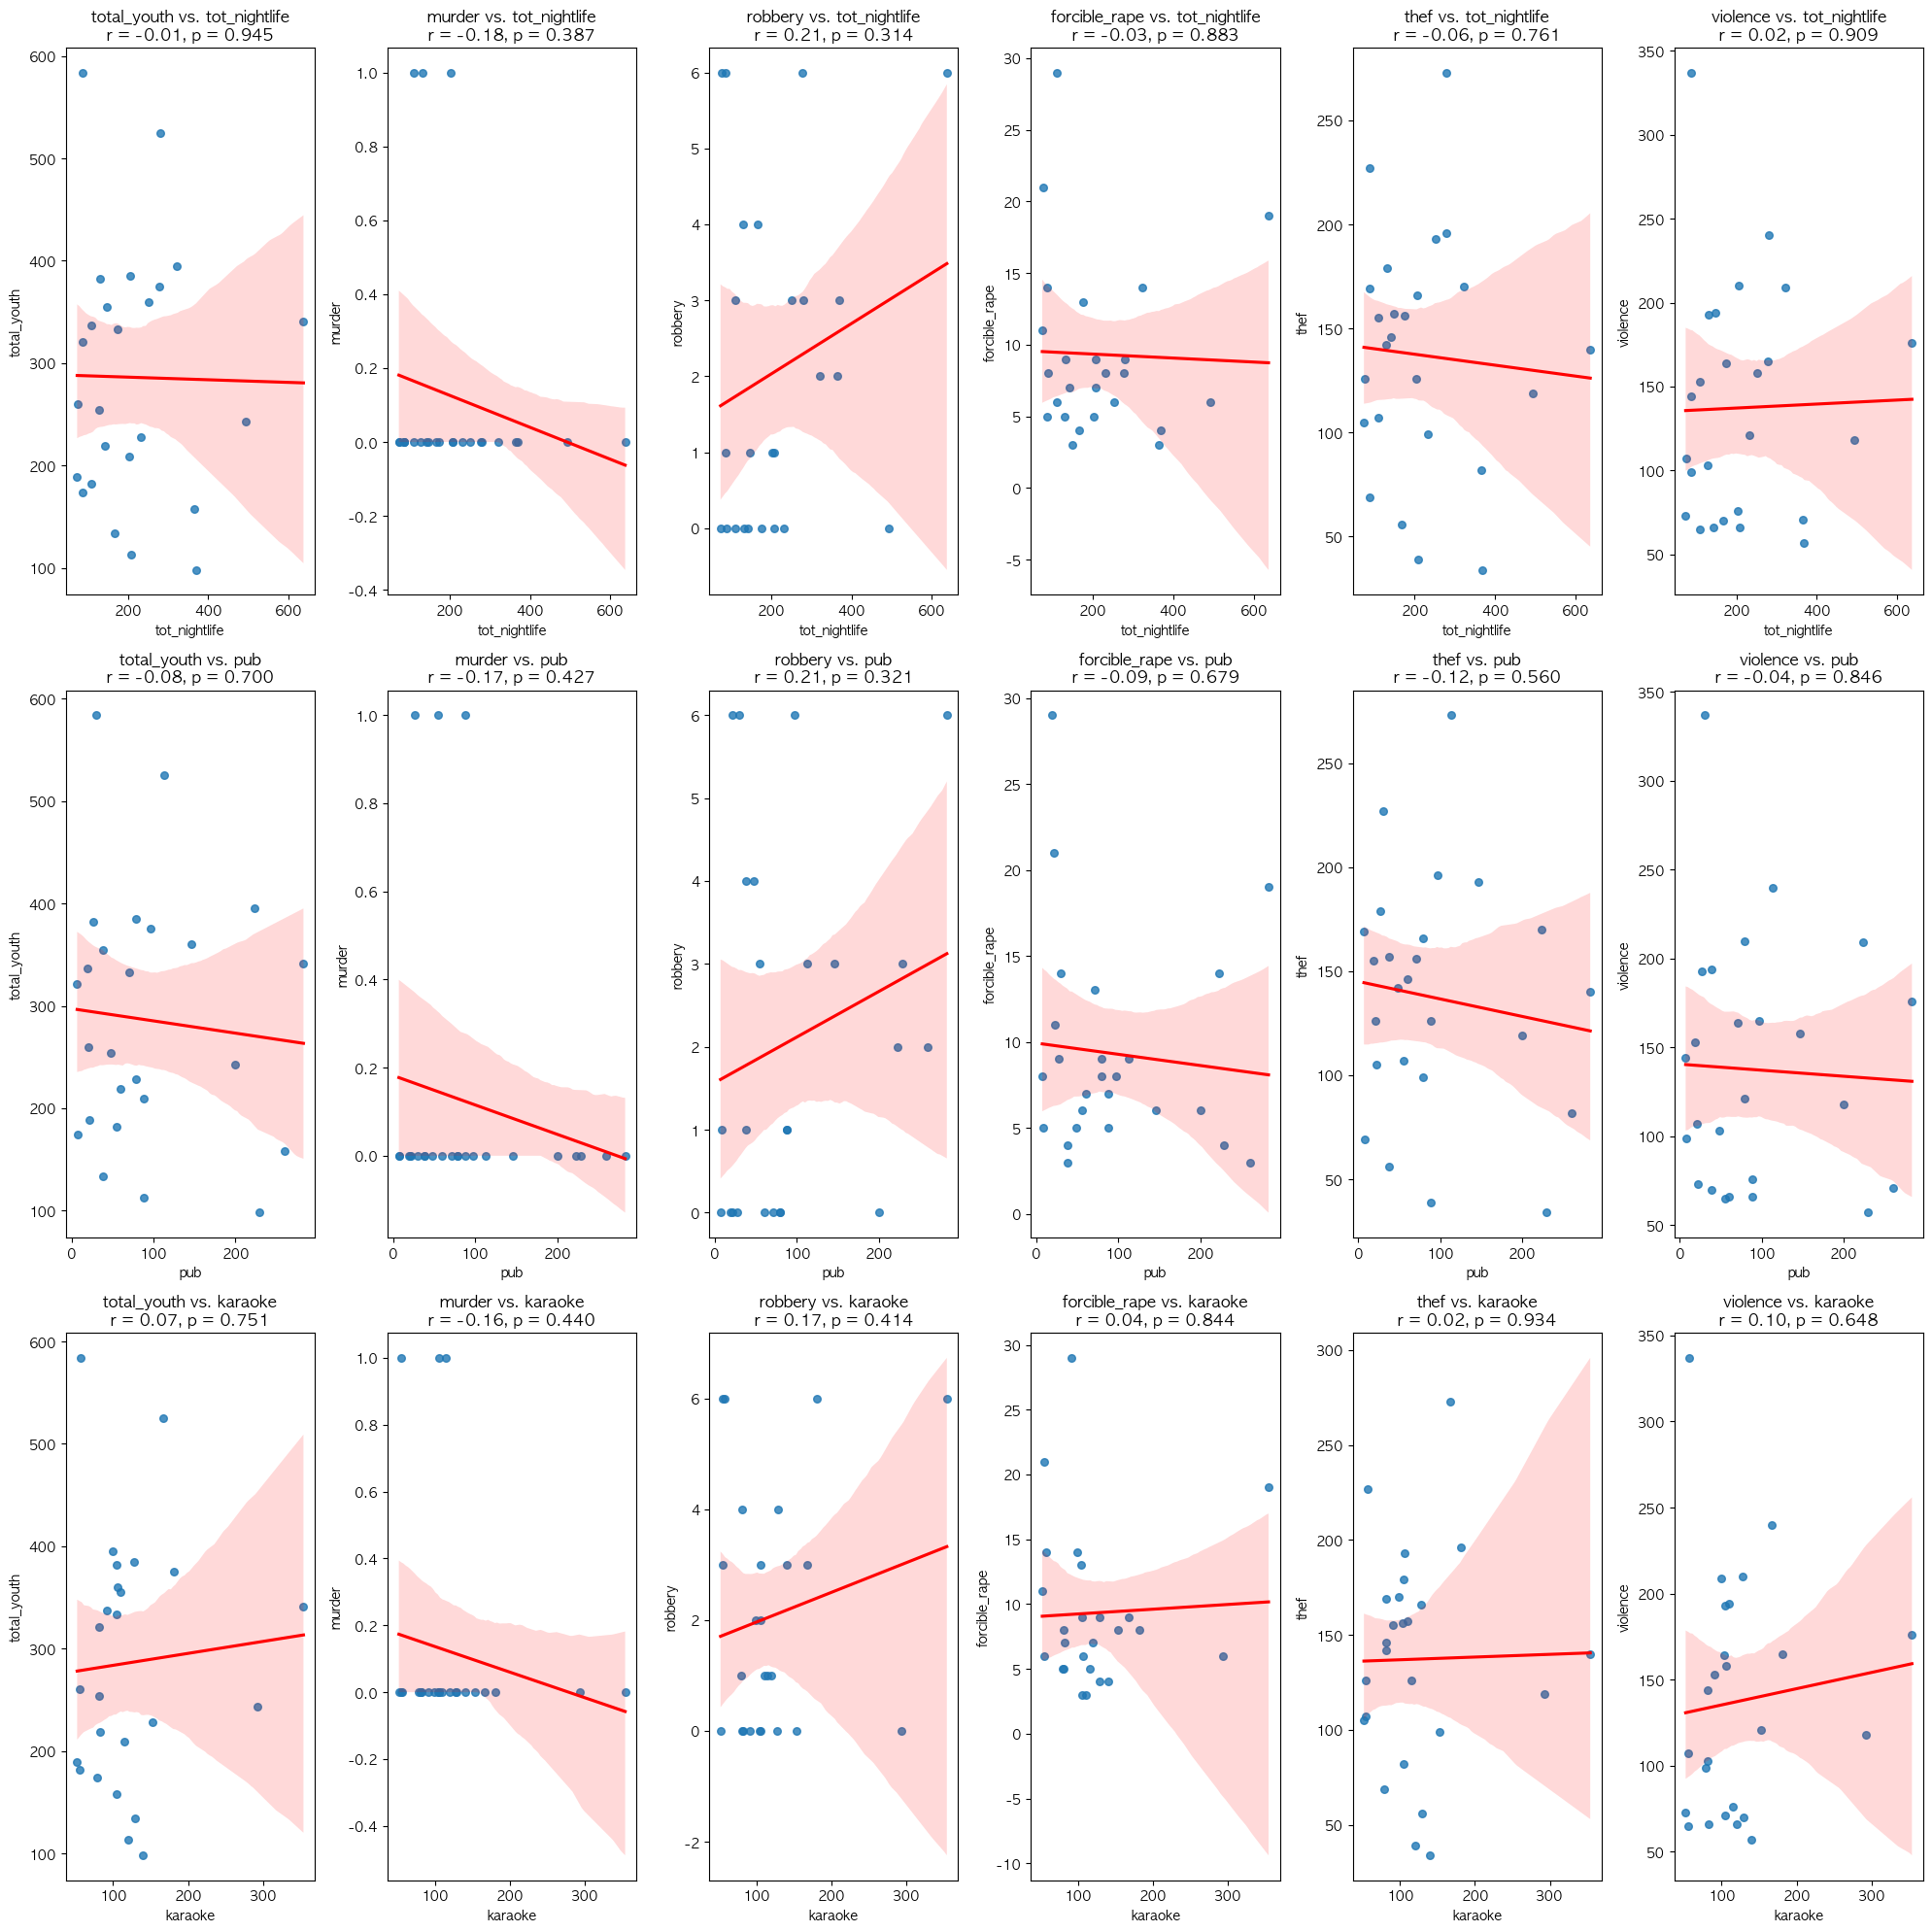


üìä ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º:

       X Variable     Y Variable  Pearson r  p-value
0   tot_nightlife    total_youth     -0.015   0.9449
1   tot_nightlife         murder     -0.181   0.3871
2   tot_nightlife        robbery      0.210   0.3143
3   tot_nightlife  forcible_rape     -0.031   0.8826
4   tot_nightlife           thef     -0.064   0.7609
5   tot_nightlife       violence      0.024   0.9094
6             pub    total_youth     -0.081   0.7002
7             pub         murder     -0.166   0.4270
8             pub        robbery      0.207   0.3209
9             pub  forcible_rape     -0.087   0.6786
10            pub           thef     -0.122   0.5604
11            pub       violence     -0.041   0.8457
12        karaoke    total_youth      0.067   0.7507
13        karaoke         murder     -0.162   0.4405
14        karaoke        robbery      0.171   0.4143
15        karaoke  forcible_rape      0.041   0.8443
16        karaoke           thef      0.018   0.9335
17        karaoke 

<Figure size 640x480 with 0 Axes>

In [26]:
import pandas as pd
from scipy.stats import pearsonr
import itertools

# 3. Î∂ÑÏÑùÌï† Î≥ÄÏàò Î™©Î°ù Ï†ïÏùò
x_vars = ['tot_nightlife', 'pub', 'karaoke']
y_vars = ['total_youth', 'murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 4. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º Ï†ÄÏû•
correlation_results = []

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 20))
plot_idx = 1

for x, y in itertools.product(x_vars, y_vars):
    r, p = pearsonr(data[x], data[y])
    correlation_results.append({
        'X Variable': x,
        'Y Variable': y,
        'Pearson r': round(r, 3),
        'p-value': round(p, 4)
    })

    # ÌöåÍ∑ÄÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    plt.subplot(len(x_vars), len(y_vars), plot_idx)
    sns.regplot(x=x, y=y, data=data, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.title(f'{y} vs. {x}\nr = {r:.2f}, p = {p:.3f}')
    plt.xlabel(x)
    plt.ylabel(y)
    plot_idx += 1

plt.tight_layout()
plt.savefig('image/figure07.png')
plt.show()


# 6. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≤∞Í≥º Ï∂úÎ†•
correlation_df = pd.DataFrame(correlation_results)
print("\nüìä ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º:\n")
print(correlation_df)


| X Variable     | Y Variable     | Pearson r | p-value | Ìï¥ÏÑù                     |
|----------------|----------------|-----------|---------|--------------------------|
| tot_nightlife  | total_youth    | -0.015    | 0.9449  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | murder         | -0.181    | 0.3871  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | robbery        | 0.210     | 0.3143  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | forcible_rape  | -0.031    | 0.8826  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | thef           | -0.064    | 0.7609  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| tot_nightlife  | violence       | 0.024     | 0.9094  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | total_youth    | -0.081    | 0.7002  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | murder         | -0.166    | 0.4270  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | robbery        | 0.207     | 0.3209  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | forcible_rape  | -0.087    | 0.6786  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | thef           | -0.122    | 0.5604  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| pub            | violence       | -0.041    | 0.8457  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | total_youth    | 0.067     | 0.7507  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | murder         | -0.162    | 0.4405  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | robbery        | 0.171     | 0.4143  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | forcible_rape  | 0.041     | 0.8443  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | thef           | 0.018     | 0.9335  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |
| karaoke        | violence       | 0.096     | 0.6483  | Ïú†ÏùòÎØ∏Ìïú ÏÉÅÍ¥Ä ÏóÜÏùå       |



Pearson correlation: r = -0.328, p = 0.110
                            OLS Regression Results                            
Dep. Variable:      total_youth_ratio   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2.768
Date:                Fri, 25 Apr 2025   Prob (F-statistic):              0.110
Time:                        13:47:17   Log-Likelihood:                 63.069
No. Observations:                  25   AIC:                            -122.1
Df Residuals:                      23   BIC:                            -119.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
con

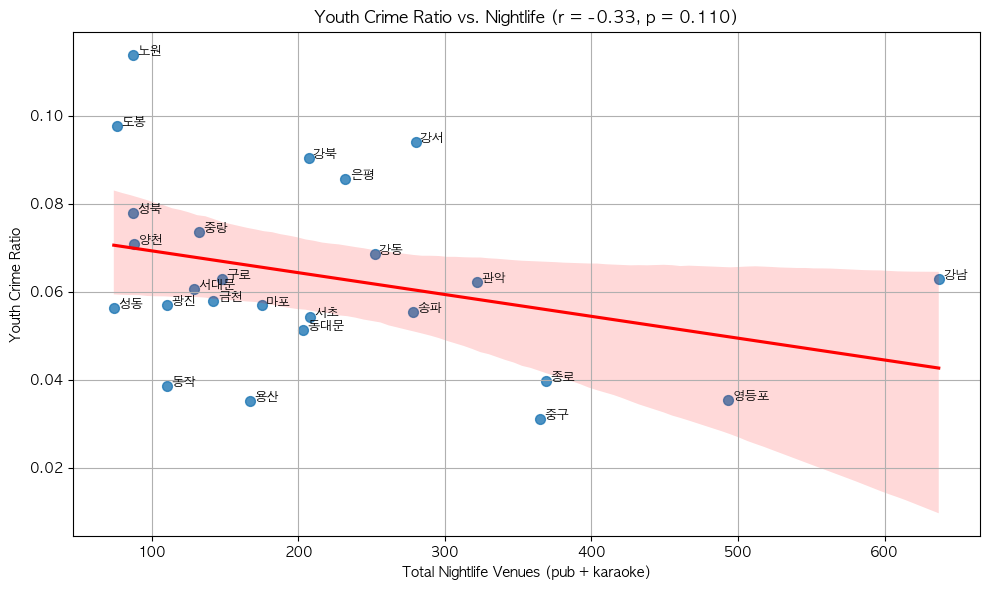

In [27]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_coef, p_value = pearsonr(data["tot_nightlife"], data["total_youth_ratio"])
print(f"Pearson correlation: r = {corr_coef:.3f}, p = {p_value:.3f}")

# ÌöåÍ∑Ä Î∂ÑÏÑù
X = sm.add_constant(data["tot_nightlife"])  # ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
y = data["total_youth_ratio"]
model = sm.OLS(y, X).fit()
print(model.summary())

# ÏÇ∞Ï†êÎèÑ + ÌöåÍ∑ÄÏÑ† ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.regplot(x="tot_nightlife", y="total_youth_ratio", data=data,
            scatter_kws={"s": 50}, line_kws={"color": "red"})

# ÎèÑÏãú Ïù¥Î¶Ñ ÎùºÎ≤® Ï∂îÍ∞Ä
for i in range(len(data)):
    plt.text(data["tot_nightlife"][i] + 3, data["total_youth_ratio"][i], data["region"][i], fontsize=9)

plt.xlabel("Total Nightlife Venues (pub + karaoke)")
plt.ylabel("Youth Crime Ratio")
plt.title(f"Youth Crime Ratio vs. Nightlife (r = {corr_coef:.2f}, p = {p_value:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
## Ìï¥ÏÑùÎ†•Ïù¥ Îñ®Ïñ¥ÏßÄÎäî Î≥ÄÏàò Ï†úÏô∏
## ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä Îß§Ïö∞ ÎÇÆÏùå (std < 1, std == 0)
## 0Ïù¥ Ï†ÑÏ≤¥Ïùò 90% Ïù¥ÏÉÅ
## 

low_variance_cols = []
for col in ['murder', 'robbery', 'forcible_rape', 'thef', 'violence']:
    std = data[col].std()
    uniq = data[col].nunique()
    zero_ratio = (data[col] == 0).mean()
    
    if std < 1 or uniq <= 2 or zero_ratio > 0.9:
        low_variance_cols.append(col)

print("Ï†úÏô∏ Í∂åÏû• Î≥ÄÏàò:", low_variance_cols)

Ï†úÏô∏ Í∂åÏû• Î≥ÄÏàò: ['murder']


## ÎπÑÍµêÏãúÍ∞ÅÌôî 2

Î≤îÏ£ÑÏàò Ïàò vs Ï≤≠ÏÜåÎÖÑ Î≤îÏ£ÑÏú® ÎπÑÍµêÎ°ú ÏßÄÏó≠ Í∞Ñ Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ ÏàòÏ§ÄÏùò ÏÉÅÎåÄÏ†Å Ï∞®Ïù¥ ÌååÏïÖ

In [29]:
data.head()

region  pub  karaoke  tot_nightlife  murder  robbery  forcible_rape  thef  \
0     Í∞ïÎÇ®  283      354            637       0        6             19   140   
1     Í∞ïÎèô  146      106            252       0        3              6   193   
2     Í∞ïÎ∂Å   79      128            207       0        0              9   166   
3     Í∞ïÏÑú  113      167            280       0        3              9   273   
4     Í¥ÄÏïÖ  223       99            322       0        2             14   170   

   violence  murder_tot  ...  thef_tot  violence_Tot  crime_tot  murder_ratio  \
0       176           3  ...      2484          2604       5422           0.0   
1       158           4  ...      2366          2712       5244           0.0   
2       210           7  ...      1434          2649       4257           0.0   
3       240           7  ...      2096          3207       5585           0.0   
4       209           9  ...      2706          3298       6345           0.0   

   robbery_ratio  rape_ratio  thef_ratio  violence_ratio  total_youth_ratio  \
0       0.285714    0.061290    0.056361        0.067588           0.062892   
1       0.500000    0.038462    0.081572        0.058260           0.068650   
2       0.000000    0.058824    0.115760        0.079275           0.090439   
3       0.230769    0.034351    0.130248        0.074836           0.094002   
4       0.166667    0.043750    0.062823        0.063372           0.062254   

   total_youth  
0          341  
1          360  
2          385  
3          525  
4          395  

[5 rows x 22 columns]

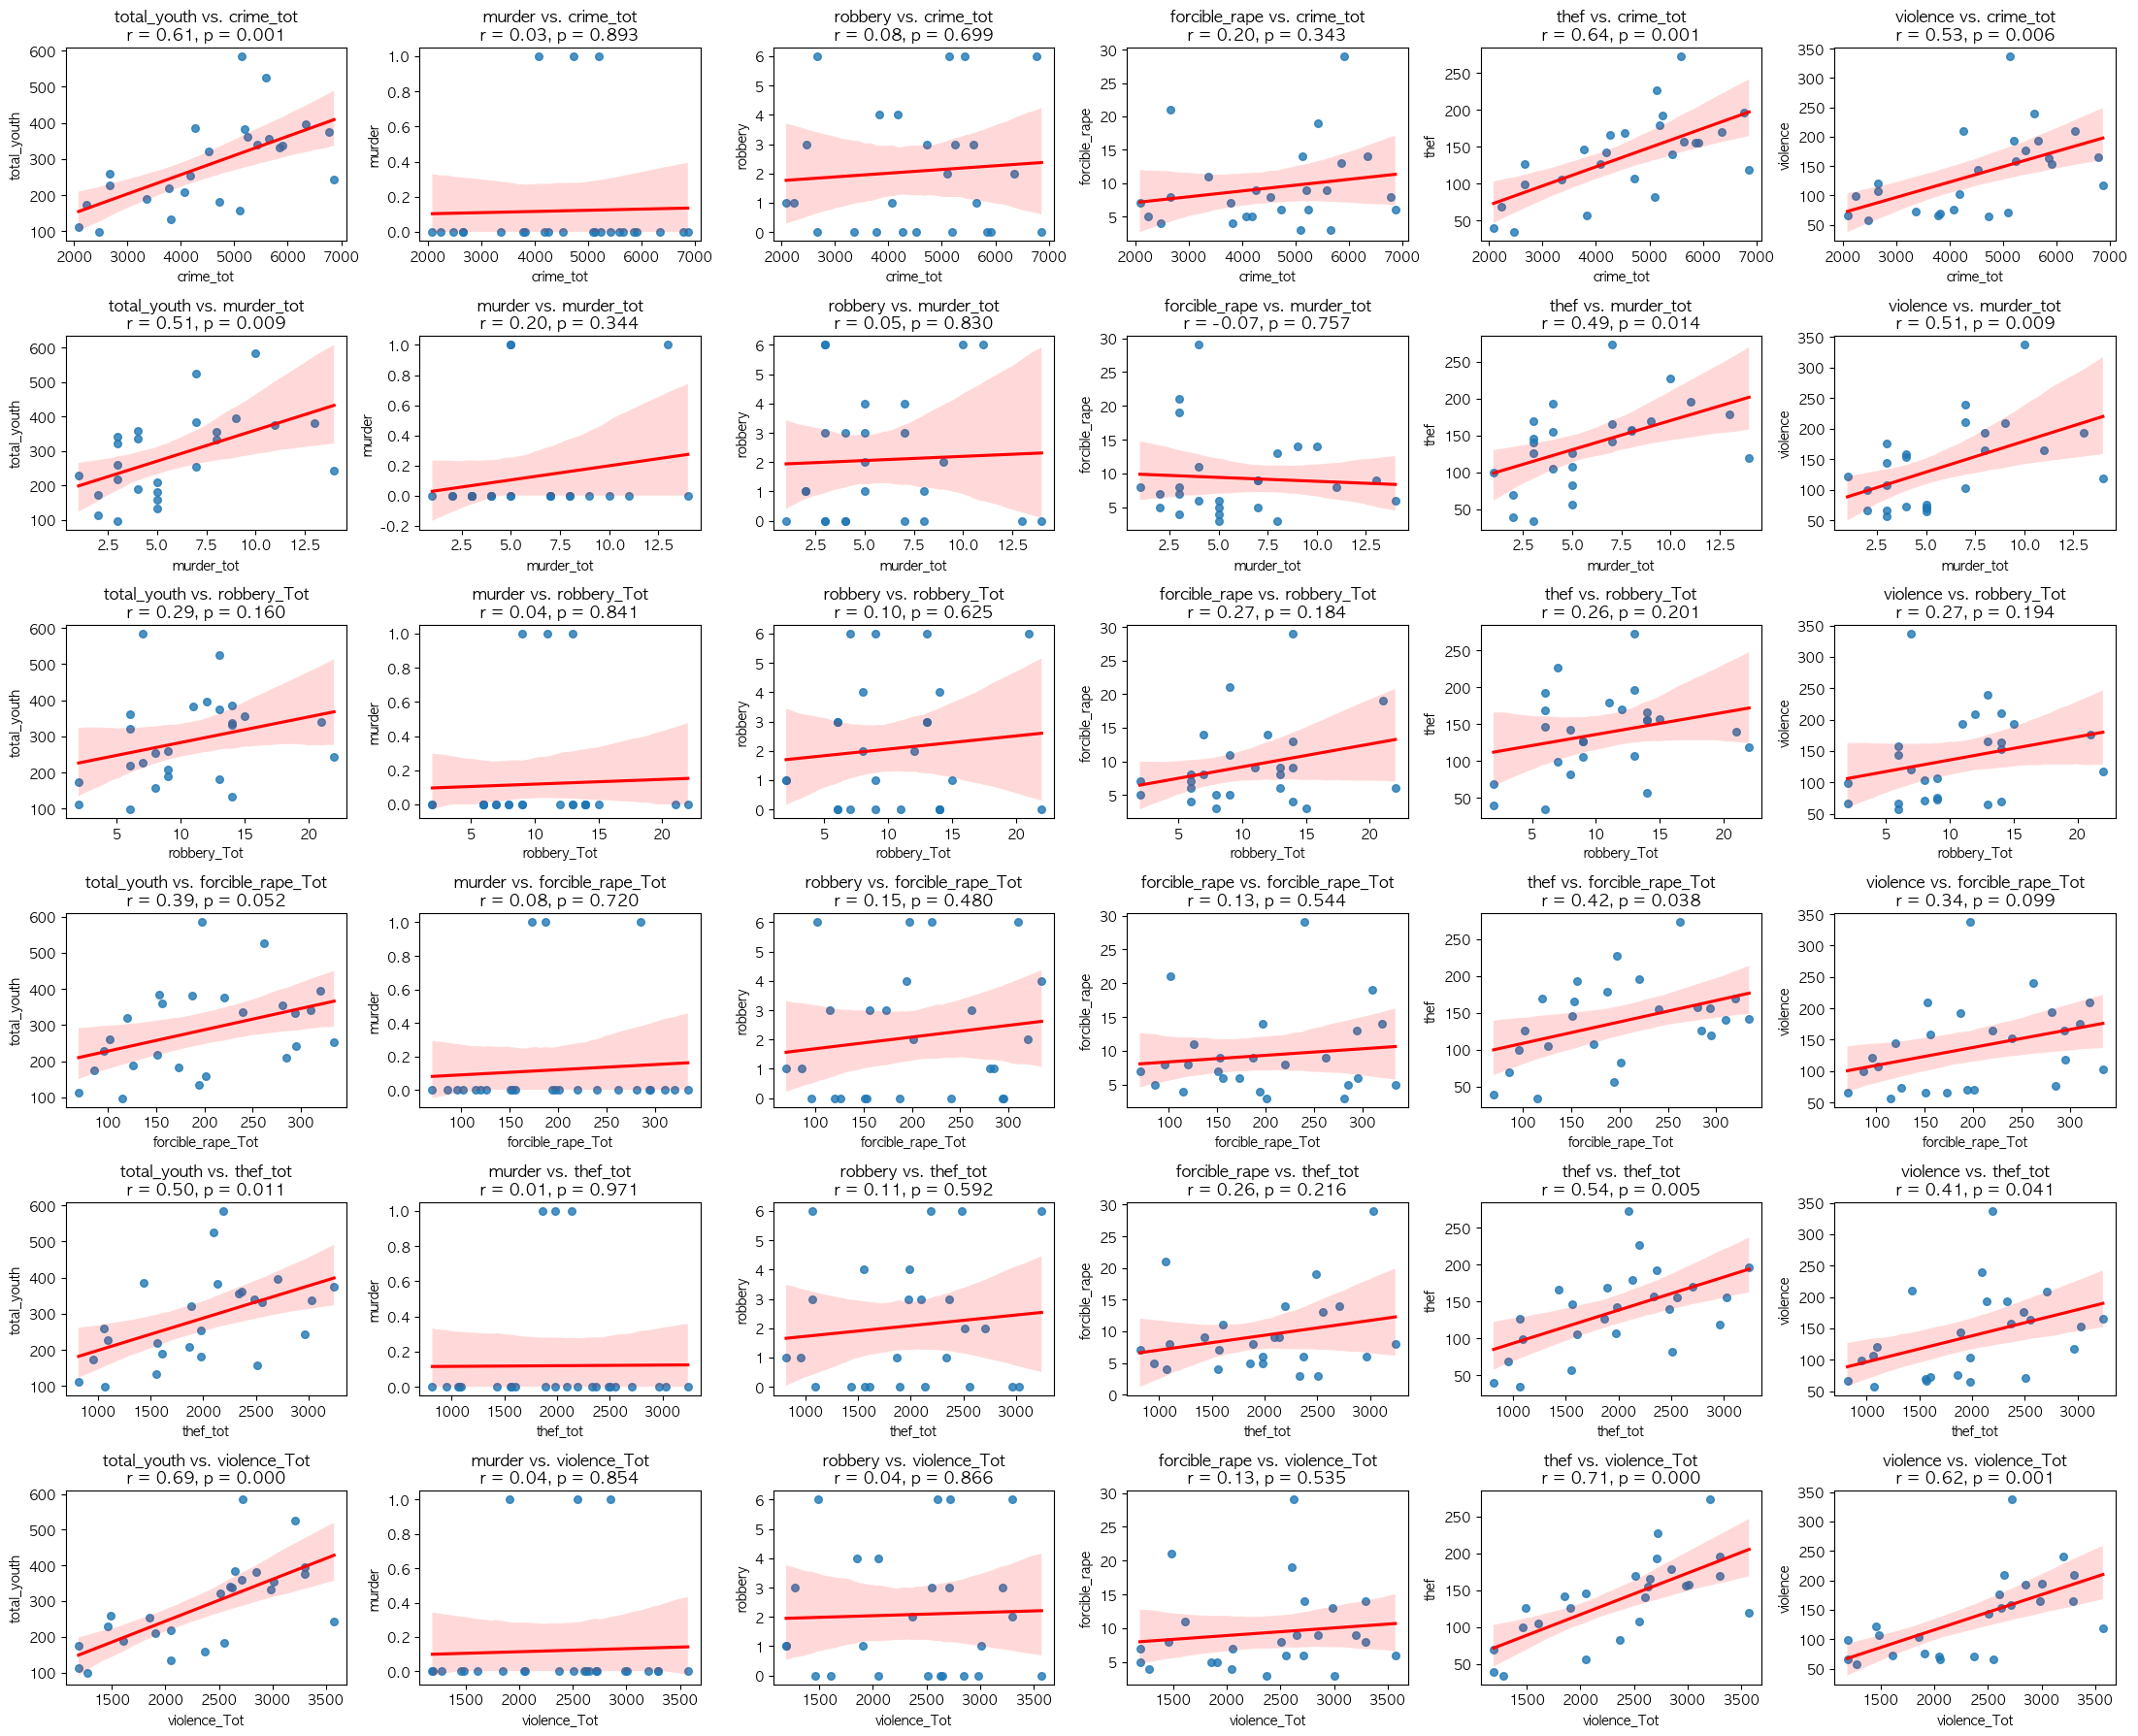


üìä ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º:

           X Variable     Y Variable  Pearson r  p-value
0           crime_tot    total_youth      0.611   0.0012
1           crime_tot         murder      0.028   0.8927
2           crime_tot        robbery      0.081   0.6992
3           crime_tot  forcible_rape      0.198   0.3432
4           crime_tot           thef      0.644   0.0005
5           crime_tot       violence      0.534   0.0060
6          murder_tot    total_youth      0.512   0.0088
7          murder_tot         murder      0.198   0.3438
8          murder_tot        robbery      0.045   0.8298
9          murder_tot  forcible_rape     -0.065   0.7570
10         murder_tot           thef      0.486   0.0137
11         murder_tot       violence      0.512   0.0088
12        robbery_Tot    total_youth      0.290   0.1598
13        robbery_Tot         murder      0.042   0.8415
14        robbery_Tot        robbery      0.103   0.6252
15        robbery_Tot  forcible_rape      0.275   0.1837
16 

In [35]:
# 3. Î∂ÑÏÑùÌï† Î≥ÄÏàò Î™©Î°ù Ï†ïÏùò
x_vars = ['crime_tot', 'murder_tot', 'robbery_Tot', 'forcible_rape_Tot', 'thef_tot', 'violence_Tot']
y_vars = ['total_youth', 'murder', 'robbery', 'forcible_rape', 'thef', 'violence']

# 4. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ Í≤∞Í≥º Ï†ÄÏû•
correlation_results = []

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(22, 18))
plot_idx = 1

for x, y in itertools.product(x_vars, y_vars):
    r, p = pearsonr(data[x], data[y])
    correlation_results.append({
        'X Variable': x,
        'Y Variable': y,
        'Pearson r': round(r, 3),
        'p-value': round(p, 4)
    })

    # ÌöåÍ∑ÄÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    plt.subplot(len(x_vars), len(y_vars), plot_idx)
    sns.regplot(x=x, y=y, data=data, scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.title(f'{y} vs. {x}\nr = {r:.2f}, p = {p:.3f}')
    plt.xlabel(x)
    plt.ylabel(y)
    plot_idx += 1

plt.tight_layout()
plt.savefig('image/figure08.png')
plt.show()

# 6. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≤∞Í≥º Ï∂úÎ†•
correlation_df = pd.DataFrame(correlation_results)
print("\nüìä ÏÉÅÍ¥ÄÎ∂ÑÏÑù Í≤∞Í≥º:\n")
print(correlation_df)

| X Variable         | Y Variable     | Pearson r | p-value | Ìï¥ÏÑù                                           |
|--------------------|----------------|-----------|---------|------------------------------------------------|
| crime_tot          | total_youth    | 0.611     | 0.0012  | Ï†ÑÏ≤¥ Î≤îÏ£Ñ ÎßéÏùÑÏàòÎ°ù Ï≤≠ÏÜåÎÖÑ Î≤îÏ£ÑÎèÑ ÎßéÏùå         |
| crime_tot          | thef           | 0.644     | 0.0005  | Ï†ÑÏ≤¥ Î≤îÏ£Ñ Ï§ë ÎèÑÎëë ÏÇ¨Í±¥Í≥º ÏÉÅÍ¥Ä ÎÜíÏùå            |
| crime_tot          | violence       | 0.534     | 0.0060  | Ìè≠Î†•Í≥ºÎèÑ ÎÜíÏùÄ ÏÉÅÍ¥Ä                             |
| murder_tot         | total_youth    | 0.512     | 0.0088  | ÏÇ¥Ïù∏ Ï¥ùÌï©Í≥º Ï≤≠ÏÜåÎÖÑ Î≤îÏ£Ñ Í∞Ñ Ïú†ÏùòÎØ∏ ÏÉÅÍ¥Ä         |
| murder_tot         | thef           | 0.486     | 0.0137  | (ÏòàÏÉÅ Ïô∏ÏßÄÎßå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÎèôÎ∞ò Î∞úÏÉù Í∞ÄÎä•)        |
| murder_tot         | violence       | 0.512     | 0.0088  |                                                |
| forcible_rape_Tot  | thef           | 0.417     | 0.0379  |                                                |
| thef_tot           | total_youth    | 0.497     | 0.0115  |                                                |
| thef_tot           | thef           | 0.539     | 0.0054  | ÎãπÏó∞Ìïú ÏÉÅÍ¥Ä (Í∞ôÏùÄ Ìï≠Î™©)                        |
| thef_tot           | violence       | 0.411     | 0.0411  |                                                |
| violence_Tot       | total_youth    | 0.685     | 0.0002  | Îß§Ïö∞ Í∞ïÌïú ÏÉÅÍ¥Ä                                 |
| violence_Tot       | thef           | 0.707     | 0.0001  | Îß§Ïö∞ Í∞ïÌïú ÏÉÅÍ¥Ä                                 |
| violence_Tot       | violence       | 0.620     | 0.0009  |                                                |